In [5]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from collections import Counter

In [6]:
df = pd.read_csv("output_iphone_Total.csv")
df['review'][1]
df

,Unnamed: 0,Unnamed: 0.1,type,category,review,star
0,0,1,아이폰12프로,전체,아이폰을 사고 배송받은 뒤 며칠 사용해본 후에 리뷰 작성하고 싶어서 이제서야 후기를...,평점5
1,1,2,아이폰12프로,전체,기변 예약을 하고 대기타다가 우연히 크리스마스날 밤에 이 곳을 알게되어 셀프 선물로...,평점5
2,2,3,아이폰12프로,전체,잘 터지지도 않고 요금만 비싼 5G를 약정걸어가며 굳이 쓰고싶지는 않아서 자급제 폰...,평점5
3,3,4,아이폰12프로,전체,대리점에 예약을 해놓고 한 달을 족히 기다렸는데 받지 못했습니다. 쿠팡은 바로바로 ...,평점5
4,4,5,아이폰12프로,전체,아이폰 프로 12 실버 구매자 입니다^^기다리고 기다리던 제품을 빠르게 받아 볼 수...,평점5
...,...,...,...,...,...,...
1744,1744,1745,아이폰12프로,전체,원래 11월 둘째주 배송예정이었는\n원래 11월 둘째주 배송예정이었는데 어제 받았어...,평점5
1745,1745,1746,아이폰12프로,전체,너무이쁜거 아닌가요 ㅠㅠㅠㅠㅠ\n너무이쁜거 아닌가요 ㅠㅠㅠㅠㅠㅠ\n진짜 앞으로 잘부...,평점5
1746,1746,1747,아이폰12프로,전체,좋아요 아주 좋아요\n좋아요 아주 좋아요,평점5
1747,1747,1748,아이폰12프로,전체,만족합니다 만족합니다\n만족합니다 만족합니다,평점5


In [7]:
#review
text=''
review=[]
for each_line in df['review']:
    review.append(each_line)
    
review[1]

'기변 예약을 하고 대기타다가 우연히 크리스마스날 밤에 이 곳을 알게되어 셀프 선물로 바로 주문, 결제했습니다! 자급제는 처음이라 설레는 긴장으로 기다렸던 기억이 새록새록하네요!!휴\n기변 예약을 하고 대기타다가 우연히 크리스마스날 밤에 이 곳을 알게되어 셀프 선물로 바로 주문, 결제했습니다! 자급제는 처음이라 설레는 긴장으로 기다렸던 기억이 새록새록하네요!!\n\n휴일과 주말 포함 25일 결제, 30일 수령했습니다. 받고 보니 무엇보다 네이버페이로 다른 자급제보다 혜택이 큰 거 같아요:)\n\n🤳🏻사용감\n6s에서 넘어왔는데 모든 게 다 새롭긴 하지만 확실히 램이 늘어나서 빠릿빠릿한게 짜릿합니다... 아이폰 쓰신 분들은 아시겠지만 창 넘길 때 부드러운 거 못 잃는데 속도도 빠르고\n\n🤳🏻컬러\n처음부터 퍼시픽블루가 원픽이었는데 고민 끝에 라스트픽도 퍼블입니다🧜🏻\u200d♀️ 받는 빛의 양에 따라서 블루 빛이 달라보인다는 후기가 기억나네요! 빛의 양에 따라\n\n🤳🏻사진\n사실 제일 기대했던 부분인데 역시는 역시👏🏻\n조명이나 해를 마주하고 찍으면 고스트 현상은 여전히 있더라구요! 첨부한 사진 참고하시면 같은 자리에서 확대 정도만 다르게 해서 찍었습니다! 어두운 데서도 잘 나오는게 굉장히 🥰'

In [8]:
#불용어 제거
import re
def clean_str(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '[^\w\s]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl='', string=text)
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')
    result = hangul.sub('',text)
    return text   

review_=[]
for i in review:
    a=clean_str(i)
    review_.append(a)  #불용어제거한 review 저장
    
review_[1]

'기변 예약을 하고 대기타다가 우연히 크리스마스날 밤에 이 곳을 알게되어 셀프 선물로 바로 주문 결제했습니다 자급제는 처음이라 설레는 긴장으로 기다렸던 기억이 새록새록하네요휴\n기변 예약을 하고 대기타다가 우연히 크리스마스날 밤에 이 곳을 알게되어 셀프 선물로 바로 주문 결제했습니다 자급제는 처음이라 설레는 긴장으로 기다렸던 기억이 새록새록하네요\n\n휴일과 주말 포함 25일 결제 30일 수령했습니다 받고 보니 무엇보다 네이버페이로 다른 자급제보다 혜택이 큰 거 같아요\n\n사용감\n6s에서 넘어왔는데 모든 게 다 새롭긴 하지만 확실히 램이 늘어나서 빠릿빠릿한게 짜릿합니다 아이폰 쓰신 분들은 아시겠지만 창 넘길 때 부드러운 거 못 잃는데 속도도 빠르고\n\n컬러\n처음부터 퍼시픽블루가 원픽이었는데 고민 끝에 라스트픽도 퍼블입니다 받는 빛의 양에 따라서 블루 빛이 달라보인다는 후기가 기억나네요 빛의 양에 따라\n\n사진\n사실 제일 기대했던 부분인데 역시는 역시\n조명이나 해를 마주하고 찍으면 고스트 현상은 여전히 있더라구요 첨부한 사진 참고하시면 같은 자리에서 확대 정도만 다르게 해서 찍었습니다 어두운 데서도 잘 나오는게 굉장히 '

In [9]:
import tweepy
# !pip install tweepy==3.10.0
# !pip install konlpy
from konlpy.tag import Okt
t = Okt()

a= len(review_) #불용어 제거한 리뷰
token_review_list=[]
for i in range(0,a): # 리뷰하나당 처리하기위해 for문 
    token_review=t.morphs(review_[i])  #t=형태소분석기. morphs=형태소 추출.review_=전처리한 리뷰.
    #token_review_str=(' '.join(token_review))  #,로 나누어져있는 형태소를 하나의 str로 묶기(df에 넣기위해서)
    #df['token_reivew'] = token_review_str  #이렇게하면 열전체값이 통일됨
    token_review_list.append(token_review) #하나의 리스트를 만들어서 df에 추가해야함.
df['token_review']=token_review_list #형태소단위로 나누어진 리뷰저장


In [10]:
df

,Unnamed: 0,Unnamed: 0.1,type,category,review,star,token_review
0,0,1,아이폰12프로,전체,아이폰을 사고 배송받은 뒤 며칠 사용해본 후에 리뷰 작성하고 싶어서 이제서야 후기를...,평점5,"[아이폰, 을, 사고, 배송, 받은, 뒤, 며칠, 사용, 해본, 후, 에, 리뷰, ..."
1,1,2,아이폰12프로,전체,기변 예약을 하고 대기타다가 우연히 크리스마스날 밤에 이 곳을 알게되어 셀프 선물로...,평점5,"[기변, 예약, 을, 하고, 대, 기, 타, 다가, 우연히, 크리스마스, 날, 밤,..."
2,2,3,아이폰12프로,전체,잘 터지지도 않고 요금만 비싼 5G를 약정걸어가며 굳이 쓰고싶지는 않아서 자급제 폰...,평점5,"[잘, 터지지도, 않고, 요금, 만, 비싼, 5, G, 를, 약정, 걸어가며, 굳이..."
3,3,4,아이폰12프로,전체,대리점에 예약을 해놓고 한 달을 족히 기다렸는데 받지 못했습니다. 쿠팡은 바로바로 ...,평점5,"[대리점, 에, 예약, 을, 해놓고, 한, 달, 을, 족, 히, 기다렸는데, 받지,..."
4,4,5,아이폰12프로,전체,아이폰 프로 12 실버 구매자 입니다^^기다리고 기다리던 제품을 빠르게 받아 볼 수...,평점5,"[아이폰, 프로, 12, 실버, 구매, 자, 입니다, 기다리고, 기다리던, 제품, ..."
...,...,...,...,...,...,...,...
1744,1744,1745,아이폰12프로,전체,원래 11월 둘째주 배송예정이었는\n원래 11월 둘째주 배송예정이었는데 어제 받았어...,평점5,"[원래, 11월, 둘째, 주, 배송, 예정, 이었는, \n, 원래, 11월, 둘째,..."
1745,1745,1746,아이폰12프로,전체,너무이쁜거 아닌가요 ㅠㅠㅠㅠㅠ\n너무이쁜거 아닌가요 ㅠㅠㅠㅠㅠㅠ\n진짜 앞으로 잘부...,평점5,"[너무, 이쁜거, 아닌가요, 너무, 이쁜거, 아닌가요, 진짜, 앞, 으로, 잘, 부..."
1746,1746,1747,아이폰12프로,전체,좋아요 아주 좋아요\n좋아요 아주 좋아요,평점5,"[좋아요, 아주, 좋아요, \n, 좋아요, 아주, 좋아요]"
1747,1747,1748,아이폰12프로,전체,만족합니다 만족합니다\n만족합니다 만족합니다,평점5,"[만족합니다, 만족합니다, \n, 만족합니다, 만족합니다]"


In [11]:
df.to_csv('iphone_total_token.csv', encoding='utf-8-sig', mode='w')

In [12]:
#별점 기준으로 정렬
df_sorted_by_star= df.sort_values(by='star' ,ascending=False)

len(df_sorted_by_star)

1749

In [13]:
df_sorted_by_star # 별점5점부터 1점까지

,Unnamed: 0,Unnamed: 0.1,type,category,review,star,token_review
0,0,1,아이폰12프로,전체,아이폰을 사고 배송받은 뒤 며칠 사용해본 후에 리뷰 작성하고 싶어서 이제서야 후기를...,평점5,"[아이폰, 을, 사고, 배송, 받은, 뒤, 며칠, 사용, 해본, 후, 에, 리뷰, ..."
1290,1290,1291,아이폰12프로,전체,너무이쁩니다 크 ~~~~~\n너무이쁩니다 크 ~~~~~,평점5,"[너무, 이쁩니다, 크, 너무, 이쁩니다, 크]"
1148,1148,1149,아이폰12프로,전체,와이프 주려고 골드로 구매 했는데엄청 좋아 할 것 같아요\n와이프 주려고 골드로 구...,평점5,"[와이프, 주, 려고, 골드, 로, 구매, 했는데, 엄청, 좋아, 할, 것, 같아요..."
1147,1147,1148,아이폰12프로,전체,11프로와 크기 차이는 거의 안 나\n11프로와 크기 차이는 거의 안 나지만\n그래...,평점5,"[11, 프로, 와, 크기, 차이는, 거의, 안, 나, \n, 11, 프로, 와, ..."
1146,1146,1147,아이폰12프로,전체,너무 좋아요 30일에 발송된다고 해서 걱정했는데 전날 와서 30일 오후에 받았어요애...,평점5,"[너무, 좋아요, 30일, 에, 발송, 된다고, 해서, 걱정, 했는데, 전날, 와서..."
...,...,...,...,...,...,...,...
1193,1193,1194,아이폰12프로,전체,상품은 최고 배송은 최악\n상품은 최고 배송은 최악,평점1,"[상품, 은, 최고, 배송, 은, 최악, \n, 상품, 은, 최고, 배송, 은, 최악]"
1301,1301,1302,아이폰12프로,전체,8일 주문해서 18일에 받았습니다 연휴가 껴있었다고 해도 늦어도 너무너무 늦어요.....,평점1,"[8일, 주문, 해서, 18일, 에, 받았습니다, 연휴, 가, 껴있었다고, 해도, ..."
1141,1141,1142,아이폰12프로,전체,코스메틱이슈로 교환서비스 최악아들껀 다른곳에서 더 좋은 가격으로 구입.\n코스메틱이...,평점1,"[코스, 메, 틱, 이슈, 로, 교환, 서비스, 최악, 아들, 껀, 다른, 곳, 에..."
261,261,262,아이폰12프로,전체,뽑기불량에 걸려서.... 액정에 흡집이 있는게.. 왔네요.판매자 고객센터에서는 해줄...,평점1,"[뽑기, 불량, 에, 걸려서, 액정, 에, 흡, 집, 이, 있는게, 왔네요, 판매,..."


In [14]:
adf=df_sorted_by_star.groupby('star').count()

In [15]:
adf

,Unnamed: 0,Unnamed: 0.1,type,category,review,token_review
star,,,,,,
평점1,8,8,8,8,8,8
평점2,10,10,10,10,10,10
평점3,28,28,28,28,28,28
평점4,142,142,142,142,142,142
평점5,1561,1561,1561,1561,1561,1561


In [16]:
# 5점 기준으로 분석
five_review=[]
five_token_review=[]
for i in range(0,1749):
    if(df['star'][i]=='평점5'):
        five_review.append(df['review'][i])  #5점리뷰모음. len=3191
        five_token_review.append(df['token_review'][i]) 
        
len(five_token_review)

1561

In [17]:
# 단어 빈도수 계산
frequency = {}

for token_review in five_token_review:
    for word in token_review:
        count = frequency.get(word,0)
        frequency[word] = count + 1

# 많이 나온 단어 순으로 정렬
sort=sorted(frequency.items(), key=lambda x: x[1], reverse=True)
sort

[('\n', 2305),
 ('배송', 1456),
 ('도', 1257),
 ('에', 1005),
 ('이', 996),
 ('너무', 738),
 ('잘', 718),
 ('아이폰', 541),
 ('구매', 532),
 ('좋아요', 523),
 ('가', 478),
 ('은', 440),
 ('빠르고', 434),
 ('을', 345),
 ('로', 304),
 ('으로', 274),
 ('폰', 266),
 ('는', 255),
 ('하고', 249),
 ('했는데', 247),
 ('주문', 246),
 ('감사합니다', 244),
 ('요', 242),
 ('실버', 241),
 ('한', 237),
 ('빨리', 235),
 ('빠른', 234),
 ('제품', 227),
 ('다', 222),
 ('해서', 219),
 ('에서', 218),
 ('사용', 213),
 ('색상', 204),
 ('것', 196),
 ('12', 193),
 ('최고', 189),
 ('보다', 184),
 ('정말', 184),
 ('를', 182),
 ('입니다', 182),
 ('했어요', 181),
 ('재고', 179),
 ('제', 178),
 ('만에', 172),
 ('역시', 171),
 ('바로', 169),
 ('받았습니다', 169),
 ('받았어요', 168),
 ('좋습니다', 165),
 ('만족합니다', 165),
 ('좋네요', 161),
 ('서', 157),
 ('프로', 155),
 ('넘', 154),
 ('양품', 151),
 ('만', 148),
 ('생각', 143),
 ('불량', 143),
 ('진짜', 143),
 ('했습니다', 140),
 ('그래', 140),
 ('파이트', 139),
 ('많이', 128),
 ('들', 127),
 ('상품', 127),
 ('자급', 127),
 ('할인', 127),
 ('아주', 126),
 ('블루', 125),
 ('왔어요', 125),
 ('고민', 124)

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

<class 'numpy.ndarray'>
(800, 800, 3)


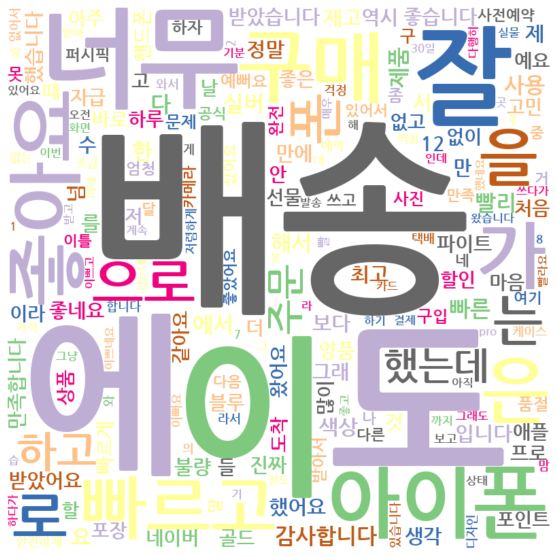

In [24]:
# 많이 나온 단어로 워드클라우드 생성
c = WordCloud(font_path = 'C:\\windows\\Fonts\\NanumGothicBold.ttf', # 글씨체
               background_color='white', # 배경색
               colormap = 'Accent_r',
               width = 800,
               height = 800)

wordcloud_words = wc.generate_from_frequencies(frequency) # 앞서 분석한 단어 빈도수로 워드클라우드 생성
array = wc.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

fig = plt.figure(figsize=(10, 10)) # 워드클라우드 그리기
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('iphone_total_worldcloud.png')